In [1]:
#import statements
import pandas as pd
import numpy as np
from numpy import linalg as la
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from matplotlib import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#raw_data
df = pd.read_csv("kc_house_data.csv")
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [3]:
#pre-processing and cleaning
#drop id and zipcode
df=df.drop(['id','date','zipcode','yr_renovated','view','waterfront'],1)
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,47.7379,-122.233,2720,8062


In [4]:
df.shape

(21613, 15)

In [5]:
X=df.drop(['price'],1)

In [6]:
Y=df[['price']]

In [7]:
Xs=(X-X.mean())/(X.std())

In [8]:
Xs.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,-0.398728,-1.447430,-0.979812,-0.228316,-0.915406,-0.629172,-0.558823,-0.734691,-0.658666,-0.544885,-0.352564,-0.306072,-0.943333,-0.260709
1,-0.398728,0.175603,0.533622,-0.189881,0.936484,-0.629172,-0.558823,0.460830,0.245136,-0.681063,1.161541,-0.746324,-0.432676,-0.187863
2,-1.473925,-1.447430,-1.426221,-0.123296,-0.915406,-0.629172,-1.409554,-1.229805,-0.658666,-1.293862,1.283507,-0.135652,1.070115,-0.172371


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(Xs, Y, test_size=0.2, random_state=0) 

In [10]:
accuracy_values=[]
mse=[]
neighbor_count=[3,5,10,12,15,20,25,30,35,40,45,50]
Ytest=Y_test.values

In [11]:
for i in neighbor_count:
    neigh = KNeighborsRegressor(n_neighbors = i, metric = 'euclidean')
    neigh.fit(X_train,Y_train)
    PRED=neigh.predict(X_test)
    Error=PRED-Ytest
    ten_score=neigh.score(X_test,Y_test)
    accuracy_values.append(ten_score)
    mse.append(mean_squared_error(Ytest,PRED))



In [12]:
print(Ytest)

[[ 297000.]
 [1578000.]
 [ 562100.]
 ...
 [ 369950.]
 [ 300000.]
 [ 575950.]]


In [13]:
print(PRED)

[[ 386111.66]
 [1609968.  ]
 [ 532385.  ]
 ...
 [ 432264.44]
 [ 258812.  ]
 [ 455947.  ]]


In [14]:
print accuracy_values

[0.7742561338257761, 0.7890281664615836, 0.7905213129736296, 0.7895297207742564, 0.7880218579299059, 0.7820522968732835, 0.777488214455668, 0.7702384288602513, 0.7666632496388464, 0.7658808307814662, 0.7630979101740246, 0.7597164430260059]


In [15]:
print mse

[26846424332.970028, 25089671145.73037, 24912099787.83246, 25030024165.583164, 25209345652.547123, 25919271339.227676, 26462051505.75228, 27324226960.24458, 27749402536.754715, 27842451127.65258, 28173407927.40315, 28575546437.131897]


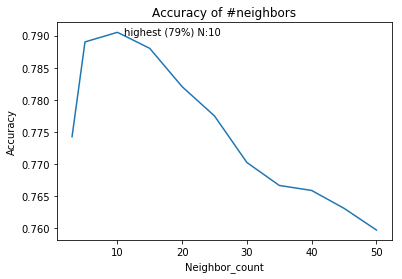

In [16]:
plt.plot(neighbor_count,accuracy_values)
plt.xlabel('Neighbor_count')
plt.ylabel('Accuracy')
plt.title('Accuracy of #neighbors')
plt.text(11,0.79, r'highest (79%) N:10')
plt.show()

In [17]:
#training the final model
neigh = KNeighborsRegressor(n_neighbors = 10, metric = 'euclidean')
neigh.fit(X,Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

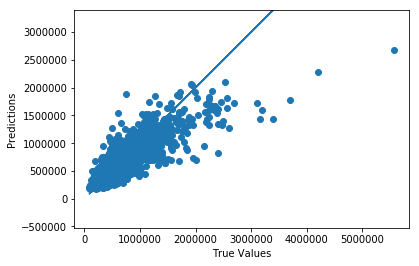

In [18]:
plt.scatter(Ytest, PRED)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot(Ytest,Ytest)